In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('..')

In [2]:
from src.modeling import (
    load_preprocessed_data,
    build_baseline_model,
    build_ensemble_model,
    evaluate_model,
    perform_cross_validation,
    compare_models,
    save_model,
    plot_pr_curve
)

In [3]:
print("Loading preprocessed data from Task 1...")
X_train, X_test, y_train, y_test = load_preprocessed_data()

Loading preprocessed data from Task 1...
Loading preprocessed data from Task 1...
Training data: (5614, 12)
Test data: (10000, 12)
Training class distribution: {1: 3743, 0: 1871}
Test class distribution: {0: 9064, 1: 936}


In [4]:
print("PART 1: BASELINE MODEL - LOGISTIC REGRESSION")
lr_model = build_baseline_model(X_train, y_train)
lr_results = evaluate_model(lr_model, X_test, y_test, "Logistic Regression")

PART 1: BASELINE MODEL - LOGISTIC REGRESSION
BUILDING BASELINE MODEL: LOGISTIC REGRESSION

Why Logistic Regression as baseline:
1. Interpretable - coefficients show feature importance
2. Fast to train - good for baseline comparison
3. Provides probability scores - useful for threshold adjustment
4. Less prone to overfitting with imbalanced data

Training Logistic Regression...
Model trained successfully!
Number of features: 12

Top 10 most important features (coefficient magnitude):
                    feature  coefficient
2   time_since_signup_hours    -0.845763
5             source_Direct     0.238632
9             browser_Opera    -0.167563
11                    sex_M     0.159366
6                source_SEO     0.115745
8                browser_IE    -0.083101
10           browser_Safari    -0.063975
4               day_of_week     0.053363
1                       age     0.041673
7           browser_FireFox    -0.032446
EVALUATING LOGISTIC REGRESSION

Performance Metrics:
AUC-ROC:

In [5]:
from sklearn.linear_model import LogisticRegression
print("CROSS-VALIDATION: LOGISTIC REGRESSION")
lr_cv = LogisticRegression(
    max_iter=1000, random_state=42, class_weight='balanced')
lr_cv_results = perform_cross_validation(
    lr_cv, X_train, y_train, "Logistic Regression", cv=5)

CROSS-VALIDATION: LOGISTIC REGRESSION
STRATIFIED 5-FOLD CROSS VALIDATION - LOGISTIC REGRESSION
Performing 5-fold stratified cross-validation...
Training samples per fold: ~1122

AUC_PR:
  Fold scores: ['0.8782', '0.8705', '0.8892', '0.8849', '0.8874']
  Mean: 0.8820
  Std:  0.0069
  95% CI: [0.8685, 0.8955]

F1:
  Fold scores: ['0.7569', '0.7339', '0.7619', '0.7550', '0.7557']
  Mean: 0.7527
  Std:  0.0097
  95% CI: [0.7337, 0.7717]

ROC_AUC:
  Fold scores: ['0.7577', '0.7397', '0.7797', '0.7667', '0.7585']
  Mean: 0.7604
  Std:  0.0131
  95% CI: [0.7349, 0.7860]


PART 2: ENSEMBLE MODEL - RANDOM FOREST
BUILDING ENSEMBLE MODEL: RANDOM FOREST

Why Random Forest:
1. Handles non-linear relationships
2. Robust to outliers and irrelevant features
3. Built-in feature importance
4. Good performance on imbalanced data with class_weight
5. Less prone to overfitting than single decision trees

Training Random Forest...


Model trained successfully!
Number of trees: 100
Number of features: 12

Top 10 most important features:
                    feature  importance
2   time_since_signup_hours    0.833704
0            purchase_value    0.044650
1                       age    0.036395
3               hour_of_day    0.032910
4               day_of_week    0.019507
11                    sex_M    0.008212
5             source_Direct    0.005833
6                source_SEO    0.005784
8                browser_IE    0.004705
7           browser_FireFox    0.004238


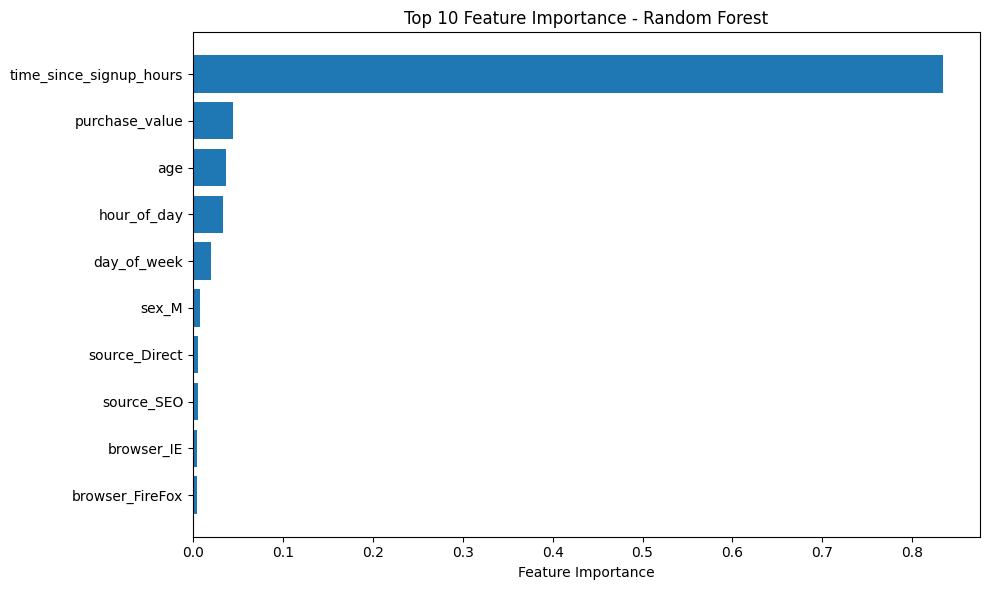

EVALUATING RANDOM FOREST

Performance Metrics:
AUC-ROC: 0.7694
AUC-PR:  0.6297  ← MOST IMPORTANT FOR IMBALANCED DATA
F1-Score: 0.6729

Confusion Matrix:
                Predicted
               0       1
Actual 0   [  9006      58]  → False Positives: 58
        1   [   432     504]  → False Negatives: 432

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.95      0.99      0.97      9064
       Fraud       0.90      0.54      0.67       936

    accuracy                           0.95     10000
   macro avg       0.93      0.77      0.82     10000
weighted avg       0.95      0.95      0.95     10000


Business Impact Analysis:
False Positives (legitimate flagged as fraud): 58
  → Could alienate 58 customers
False Negatives (fraud missed): 432
  → Potential financial loss from 432 fraud cases


In [6]:
print("PART 2: ENSEMBLE MODEL - RANDOM FOREST")
rf_model = build_ensemble_model(X_train, y_train)
rf_results = evaluate_model(rf_model, X_test, y_test, "Random Forest")

In [7]:
from src.modeling import basic_hyperparameter_tuning
print("BASIC HYPERPARAMETER TUNING DEMONSTRATION")

best_model, best_params = basic_hyperparameter_tuning(X_train, y_train)

print(f"\nTuned parameters: {best_params}")
print("\nThis demonstrates hyperparameter tuning concept.")
print("Full tuning will be implemented in final submission.")

BASIC HYPERPARAMETER TUNING DEMONSTRATION

Basic Hyperparameter Tuning for Random Forest
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best AUC-PR: 0.8982

Tuned parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

This demonstrates hyperparameter tuning concept.
Full tuning will be implemented in final submission.


In [8]:
from sklearn.ensemble import RandomForestClassifier
print("CROSS-VALIDATION: RANDOM FOREST")
rf_cv = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)
rf_cv_results = perform_cross_validation(
    rf_cv, X_train, y_train, "Random Forest", cv=5)

CROSS-VALIDATION: RANDOM FOREST
STRATIFIED 5-FOLD CROSS VALIDATION - RANDOM FOREST
Performing 5-fold stratified cross-validation...
Training samples per fold: ~1122

AUC_PR:
  Fold scores: ['0.9028', '0.8929', '0.8969', '0.9060', '0.9064']
  Mean: 0.9010
  Std:  0.0053
  95% CI: [0.8907, 0.9114]

F1:
  Fold scores: ['0.6986', '0.7038', '0.7112', '0.7225', '0.7138']
  Mean: 0.7100
  Std:  0.0082
  95% CI: [0.6938, 0.7261]

ROC_AUC:
  Fold scores: ['0.7833', '0.7577', '0.7658', '0.7874', '0.7900']
  Mean: 0.7768
  Std:  0.0128
  95% CI: [0.7518, 0.8019]


In [9]:
print("PART 3: MODEL COMPARISON AND SELECTION")
selected_model, comparison_df = compare_models(lr_results, rf_results)

PART 3: MODEL COMPARISON AND SELECTION
MODEL COMPARISON AND SELECTION

Performance Comparison:
         Metric  Logistic Regression  Random Forest              Winner
         AUC-PR             0.435780       0.629745       Random Forest
        AUC-ROC             0.759507       0.769425       Random Forest
       F1-Score             0.275016       0.672897       Random Forest
False Positives          3210.000000      58.000000       Random Forest
False Negatives           275.000000     432.000000 Logistic Regression
FINAL MODEL SELECTION

Decision Criteria:
1. AUC-PR is most important for imbalanced fraud detection
2. False negatives (missed fraud) cause financial loss
3. False positives (annoyed customers) affect user experience
4. Model interpretability for business stakeholders

Key Differences:
AUC-PR difference (RF - LR): 0.1940
Additional false negatives with RF: 157
Additional false positives with RF: -3152

Selected Model: Random Forest
Reason: Significantly better AUC-PR 

In [9]:
print("SAVING SELECTED MODEL")
if selected_model == "Logistic Regression":
    model_path = save_model(lr_model, "logistic_regression_baseline")
else:
    model_path = save_model(rf_model, "random_forest_ensemble")

print(f"Selected model saved to: {model_path}")

SAVING SELECTED MODEL

Model saved as: models/random_forest_ensemble.pkl
Selected model saved to: models/random_forest_ensemble.pkl


GENERATING COMPARISON VISUALIZATIONS


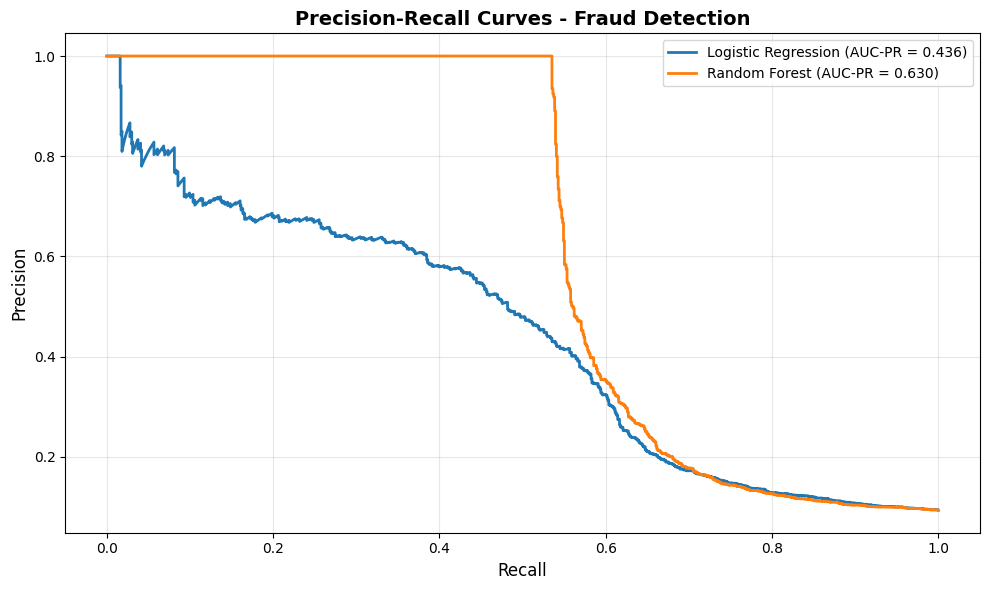

In [10]:
print("GENERATING COMPARISON VISUALIZATIONS")
plot_pr_curve(y_test, lr_results['y_pred_proba'], rf_results['y_pred_proba'])

In [11]:
print("PERFORMANCE SUMMARY")
summary = pd.DataFrame({
    'Metric': ['AUC-PR', 'AUC-ROC', 'F1-Score', 'Precision', 'Recall',
               'False Positives', 'False Negatives', 'Total Correct'],
    'Logistic Regression': [
        f"{lr_results['auc_pr']:.4f}",
        f"{lr_results['auc_roc']:.4f}",
        f"{lr_results['f1_score']:.4f}",
        f"{lr_results['confusion_matrix'][1, 1]/(lr_results['confusion_matrix'][1, 1]+lr_results['confusion_matrix'][0, 1]):.4f}" if (
            lr_results['confusion_matrix'][1, 1]+lr_results['confusion_matrix'][0, 1]) > 0 else "0.0000",
        f"{lr_results['confusion_matrix'][1, 1]/(lr_results['confusion_matrix'][1, 1]+lr_results['confusion_matrix'][1, 0]):.4f}" if (
            lr_results['confusion_matrix'][1, 1]+lr_results['confusion_matrix'][1, 0]) > 0 else "0.0000",
        f"{lr_results['confusion_matrix'][0, 1]}",
        f"{lr_results['confusion_matrix'][1, 0]}",
        f"{lr_results['confusion_matrix'][0, 0] + lr_results['confusion_matrix'][1, 1]}"
    ],
    'Random Forest': [
        f"{rf_results['auc_pr']:.4f}",
        f"{rf_results['auc_roc']:.4f}",
        f"{rf_results['f1_score']:.4f}",
        f"{rf_results['confusion_matrix'][1, 1]/(rf_results['confusion_matrix'][1, 1]+rf_results['confusion_matrix'][0, 1]):.4f}" if (
            rf_results['confusion_matrix'][1, 1]+rf_results['confusion_matrix'][0, 1]) > 0 else "0.0000",
        f"{rf_results['confusion_matrix'][1, 1]/(rf_results['confusion_matrix'][1, 1]+rf_results['confusion_matrix'][1, 0]):.4f}" if (
            rf_results['confusion_matrix'][1, 1]+rf_results['confusion_matrix'][1, 0]) > 0 else "0.0000",
        f"{rf_results['confusion_matrix'][0, 1]}",
        f"{rf_results['confusion_matrix'][1, 0]}",
        f"{rf_results['confusion_matrix'][0, 0] + rf_results['confusion_matrix'][1, 1]}"
    ]
})

print("\nModel Performance Comparison:")
print(summary.to_string(index=False))

PERFORMANCE SUMMARY

Model Performance Comparison:
         Metric Logistic Regression Random Forest
         AUC-PR              0.4358        0.6297
        AUC-ROC              0.7595        0.7694
       F1-Score              0.2750        0.6729
      Precision              0.1708        0.8968
         Recall              0.7062        0.5385
False Positives                3210            58
False Negatives                 275           432
  Total Correct                6515          9510


In [12]:
print("BUSINESS IMPACT ANALYSIS")
print("\nFor Logistic Regression:")
print(
    f" Would miss {lr_results['confusion_matrix'][1, 0]} fraud cases (potential loss)")
print(
    f" Would annoy {lr_results['confusion_matrix'][0, 1]} legitimate customers")

print("\nFor Random Forest:")
print(
    f" Would miss {rf_results['confusion_matrix'][1, 0]} fraud cases (potential loss)")
print(
    f" Would annoy {rf_results['confusion_matrix'][0, 1]} legitimate customers")

print(f"\nSelected Model: {selected_model}")
print(f"Reason: Based on AUC-PR performance and business impact balance")

BUSINESS IMPACT ANALYSIS

For Logistic Regression:
 Would miss 275 fraud cases (potential loss)
 Would annoy 3210 legitimate customers

For Random Forest:
 Would miss 432 fraud cases (potential loss)
 Would annoy 58 legitimate customers

Selected Model: Random Forest
Reason: Based on AUC-PR performance and business impact balance


In [ ]:
print("PREPARING FOR TASK 3: MODEL EXPLAINABILITY")
predictions_df = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred_lr': lr_results['y_pred'],
    'y_pred_proba_lr': lr_results['y_pred_proba'],
    'y_pred_rf': rf_results['y_pred'],
    'y_pred_proba_rf': rf_results['y_pred_proba']
})

predictions_df.to_csv('../data/processed/model_predictions.csv', index=False)

PREPARING FOR TASK 3: MODEL EXPLAINABILITY
